In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
import os
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /home/nikhil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
data = pd.read_csv(r"/mnt/d/my projects/sentiment-analysis-using-social-media-mesages/data/sentimentdataset.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [75]:
data.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [76]:
#droping unwanted data
data.drop(["Unnamed: 0.1",
            "Unnamed: 0",
          "Timestamp",
          "User",
          "Hashtags",
          "Retweets",
          "Likes",
          "Year",
          "Month",
          "Day",
          "Hour"],axis=1, inplace= True)

data.columns

Index(['Text', 'Sentiment', 'Platform', 'Country'], dtype='object')

In [77]:
#details of the dataset
def data_processing(data):
    na_data = [df for df in data.columns if data[df].isnull().sum() > 0]
    src_data = data[na_data].isnull().sum().sort_values(ascending = False)
    na_ratio = (data[na_data].isnull().sum()/ data.shape[0]*100).sort_values(ascending = False)
    null_df_ratio = pd.concat([src_data, round(na_ratio, 2)],axis = 1, keys=["missing_values", "ratio"])
    null_df_ratio = pd.DataFrame(null_df_ratio)
    return null_df_ratio

def process_post(data, head=5, tail=5):
    print('SHAPE'.center(82,'~'))
    print('Rows: {}'.format(data.shape[0]))
    print('Columns: {}'.format(data.shape[1]))
    print('TYPES'.center(82,'~'))
    print(data.dtypes)
    print("".center(82,'~'))
    print(data_processing(data))
    print("DUPLICATE VALUES".center(82,'~'))
    print(data.duplicated().sum())
       
process_post(data)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 732
Columns: 4
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Text         object
Sentiment    object
Platform     object
Country      object
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Empty DataFrame
Columns: [missing_values, ratio]
Index: []
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATE VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
21


In [78]:
#lets find the unique values of our dataset
def unique_data_values_process(data: pd.DataFrame):
    n_unique = pd.DataFrame({"Feature": data.columns,
                            "Unique_Features": [data[i].nunique()
                                                for i in data.columns]})
    n_unique = n_unique.sort_values("Unique_Features", ascending = False)
    n_unique = n_unique.reset_index(drop = True)
    
    return n_unique

unique_data_values_process(data)
    

,Feature,Unique_Features
0,Text,707
1,Sentiment,279
2,Country,115
3,Platform,4


In [79]:
#drop the duplicate values

data = data.drop_duplicates(subset=None, keep='first', inplace=False)
data.duplicated().sum()

0

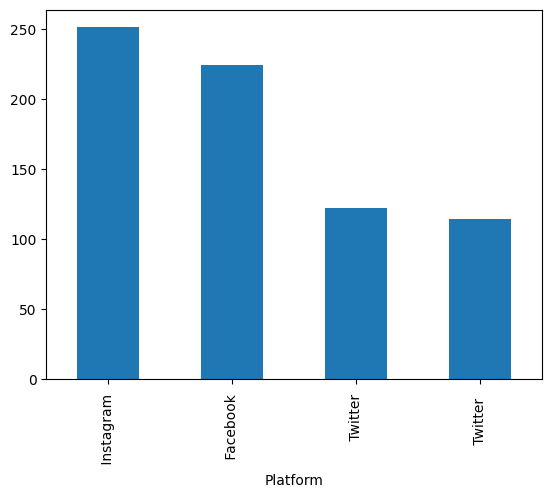

In [80]:
data["Platform"].value_counts(ascending=False).plot.bar()
plt.show()

In [81]:
#Text processing
def text_process(data):
    ps = PorterStemmer()
    for i in range(0, data.shape[0]):
        review_data = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['Text'])
        review_data = review_data.lower().split()
        stem_words = [ps.stem(word) for word in review_data if not word in STOPWORDS]
        main_data = review_data
        data.iloc[i]["Text"] = ' '.join(main_data)
    return data

In [82]:
new_data = text_process(data)

In [83]:
new_data.head()

,Text,Sentiment,Platform,Country
0,enjoying a beautiful day at the park,Positive,Twitter,USA
1,traffic was terrible this morning,Negative,Twitter,Canada
2,just finished an amazing workout,Positive,Instagram,USA
3,excited about the upcoming weekend getaway,Positive,Facebook,UK
4,trying out a new recipe for dinner tonight,Neutral,Instagram,Australia


In [84]:
#save the dataframe into csv file

class Data_save_cl:
    def __init__(self, data_path):
        self.data_path = data_path
        
    def process_csv_path(self):
        os.makedirs(os.path.dirname(self.data_path), exist_ok = True)
        new_data.to_csv(self.data_path, header= True, index= False)
        
        return "Successsfull"
    
      
def process_post(data_path_main):
    data_class_obj = Data_save_cl(data_path_main)
    main_vl = data_class_obj.process_csv_path()
    return main_vl

val_msg = process_post(r"/mnt/d/my projects/sentiment-analysis-using-social-media-mesages/data/processed.csv")

In [85]:
val_msg

'Successsfull'

In [86]:
#to transform the training data into vector form by using count vectorizer

def feature_transformation(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
    
    scaler = MinMaxScaler()
    
    X_train_arr = scaler.fit_transform(X_train)
    
    X_test_arr = scaler.transform(X_test)
    
    return (X_train_arr,
           X_test_arr,
            y_train,
            y_test
           )

In [87]:
#new_data["Sentiment"] = new_data["Sentiment"].astype('category').cat.codes

cv = CountVectorizer(max_features = 2500)
X_ = new_data["Text"]
X = cv.fit_transform(X_).toarray()
y = new_data["Sentiment"].values
X_train_arr, X_test_arr, y_train, y_test = feature_transformation(X, y)

In [88]:
print(X_train_arr.shape)
print(X_test_arr.shape)
print(y_train.shape)
print(y_test.shape)

(568, 2500)
(143, 2500)
(568,)
(143,)


In [89]:
#model train
model_rf = RandomForestClassifier()
model_rf.fit(X_train_arr, y_train)

RandomForestClassifier()

In [90]:
predictions = model_rf.predict(X_test_arr)
print(predictions)

[' Reverence     ' ' Grief ' ' Positive  ' ' Positive  ' ' Positive  '
 ' Creativity   ' ' Admiration    ' ' Positive  ' ' Wonder       '
 ' Positive  ' ' Heartbreak ' ' Excitement   ' ' Joy ' ' Positive  '
 ' Desolation ' ' Positive  ' ' Indifference    ' ' Positive  '
 ' Positive  ' ' Tenderness    ' ' Positive  ' ' Exhaustion '
 ' Happiness ' ' Despair ' ' Fulfillment   ' ' Melancholy      '
 ' Neutral ' ' Isolation ' ' Positive  ' ' Positive  ' ' Awe          '
 ' Positive  ' ' Positive  ' ' Loneliness ' ' Positive  ' ' Joy '
 ' Positive  ' ' Determination   ' ' Exploration ' ' Acceptance   '
 ' Joy ' ' Despair ' ' Radiance    ' ' Fulfillment   ' ' Positive  '
 ' Positive  ' ' Pensive ' ' Positive  ' ' Positive  ' ' Positive  '
 ' Betrayal ' ' Confusion       ' ' Joy ' ' Positive  ' ' Excitement '
 ' Despair ' ' Excitement ' ' Nostalgia ' ' Positive  ' ' Positive  '
 ' Awe          ' ' Positive  ' ' Regret ' ' Positive  ' ' Gratitude     '
 ' Positive  ' ' Ambivalence     ' ' Deter

In [91]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.23076923076923078
